In [127]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [129]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [130]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [131]:
# Reflect an existing database into a new model:
    # Declare a base
Base = automap_base()
    # Use base to reflect database
# reflect the tables
Base.prepare(autoload_with=engine)


In [132]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [133]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [134]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [135]:
# Find the most recent date in the data set.
    # Use session.query, sort by date in descending order so that the greatest number (most recent) is first, and select the first value.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
# Print this results
print(most_recent_date)

('2017-08-23',)


Text(0, 0.5, 'Precipitation (Inches)')

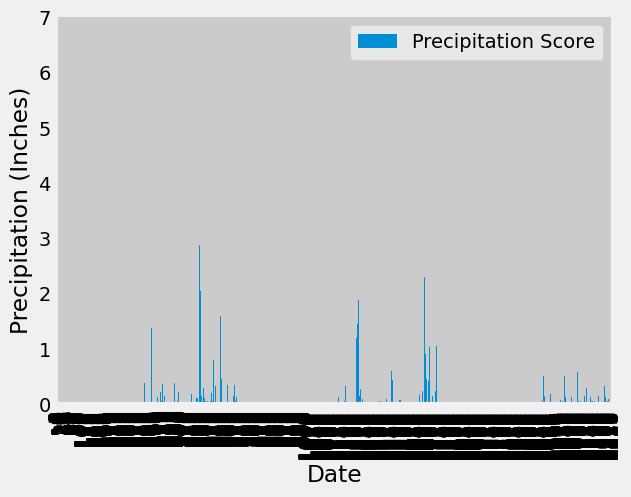

In [156]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    # As above, most recent is 2017-08-23.
# Calculate the date one year from the last date in data set.
    # One year before this would be 2016-08-23.
    # Set this date equal to a query date variable to be used in filtering.
date = dt.date(2016, 8, 23)

# Perform a query to retrieve the date and precipitation scores
prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date).all()

# Use a dictionary comprehesion to convert these results into a dictionary
prcp_rows = [{'Date': row[0], "Precipitation Score": row[1]} for row in prcp]

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_rows).set_index('Date')

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values(by=['Date'],ascending=True)

    # Add xticks
bins = [dt.date(2016,8,23),dt.date(2016,9,23),dt.date(2016,10,23),dt.date(2016,11,23),dt.date(2016,12,23),dt.date(2017,1,23),dt.date(2017,2,23),dt.date(2017,3,23),\
            dt.date(2017,3,23),dt.date(2017,4,23),dt.date(2017,5,23),dt.date(2017,6,23),dt.date(2017,7,23),dt.date(2017,8,23)]

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df_sorted.plot.bar(use_index=False)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")


In [152]:
print(bins)

[datetime.date(2016, 8, 23), datetime.date(2016, 9, 23), datetime.date(2016, 10, 23), datetime.date(2016, 11, 23), datetime.date(2016, 12, 23), datetime.date(2017, 1, 23), datetime.date(2017, 2, 23), datetime.date(2017, 3, 23), datetime.date(2017, 3, 23), datetime.date(2017, 4, 23), datetime.date(2017, 5, 23), datetime.date(2017, 6, 23), datetime.date(2017, 7, 23), datetime.date(2017, 8, 23)]


In [137]:
# Use Pandas to calculate the summary statistics for the precipitation data
min = prcp_df["Precipitation Score"].min()
max = prcp_df["Precipitation Score"].max()
mean = prcp_df["Precipitation Score"].mean()
print(f'The maximum precipitation was {max}')
print(f'The maximum precipitation was {min}')
print(f'The mean precipitation was {mean}')

The maximum precipitation was 6.7
The maximum precipitation was 0.0
The mean precipitation was 0.17727857496288996


# Exploratory Station Analysis

In [138]:
# Design a query to calculate the total number stations in the dataset
    # Use session.query and the distinct function
station_num = session.query(measurement.station).distinct().count()
# Print the results
print(f' There are {station_num} different stations')

 There are 9 different stations


In [139]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()
print(station_counts)
# Find the most active station
active_station = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).first()
# Isolate the station 
most_active_station = active_station[0]
print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [140]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
    # Set up a selection variable using the func command to make query cleaner
select_min = [measurement.tobs, func.min(measurement.tobs)]
select_max = [measurement.tobs, func.max(measurement.tobs)]
select_mean = [measurement.tobs, func.avg(measurement.tobs)]
    # Use select and filter for active station
active_min = session.query(*select_min).filter(measurement.station == most_active_station).first()
active_max = session.query(*select_max).filter(measurement.station == most_active_station).first()
active_mean = session.query(*select_mean).filter(measurement.station == most_active_station).first()

    # Clean up the summary values
active_min1 = active_min[1]
active_max1 = active_max[1]
active_mean1 = active_mean[1]

    # Print the summaries
print(f'The minimum temperate at the most active station was {active_min1}')
print(f'The maximum temperate at the most active station was {active_max1}')
print(f'The mean temperate at the most active station was {active_mean1}')

The minimum temperate at the most active station was 54.0
The maximum temperate at the most active station was 85.0
The mean temperate at the most active station was 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

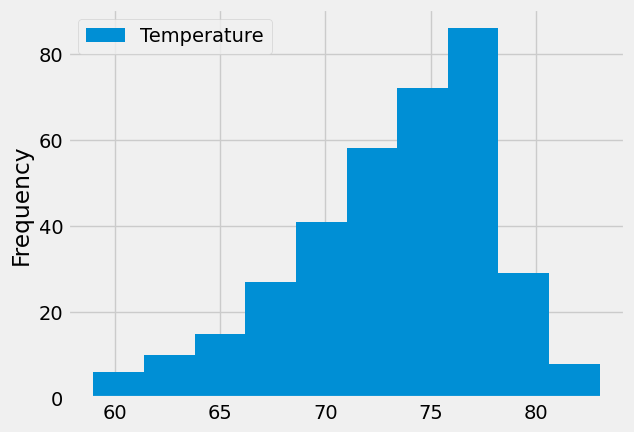

In [141]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.date, measurement.tobs).filter(measurement.date >= date).filter(measurement.station==most_active_station).all()

# Convert to dictionary
temps_rows = [{'Date': row[0], "Temperature": row[1]} for row in temps]

# Store this data in a pandas dataframe
temps_df = pd.DataFrame(temps_rows).set_index('Date')

# Plot the histogram
temps_df.plot.hist()


# Close session

In [142]:
# Close Session
session.close()